In [1]:
import pandas as pd
import numpy as np

# Phase 1 : Construction de l'échantillon

In [2]:
data = pd.read_csv("FAOSTAT_stats_1.csv")
data = data[['Pays', 'Produit', 'Élément', 'Année', 'Valeur']]
data = pd.pivot_table(data, index=['Année', 'Pays', 'Produit'], 
                      columns = ['Élément'],
                     values='Valeur')
data = data.reset_index()

#Unités : 

#Passons la disponibilité alimentaire en kcal/pers/an au lieu de kcal/pers/jour : 
data['Disponibilité alimentaire (Kcal/personne/jour)'] = data['Disponibilité alimentaire (Kcal/personne/jour)']*365
data = data.rename(columns = {'Disponibilité alimentaire (Kcal/personne/jour)':'Dispo_alim (kcal/personne)'})

#Passons la disponinilité de protéines en kg/pers/an au lieu de g/pers/jour : 
data['Disponibilité de protéines en quantité (g/personne/jour)'] = data['Disponibilité de protéines en quantité (g/personne/jour)']*0.365
data = data.rename(columns = {'Disponibilité de protéines en quantité (g/personne/jour)' : 'Dispo_prot (kg/personne)'})

#Changeons le nom de Disponibilité alimentaire en quantité : 
data = data.rename(columns = {'Disponibilité alimentaire en quantité (kg/personne/an)' : 'Dispo_alim (kg/personne)'})

data.head()

Élément,Année,Pays,Produit,Dispo_alim (kcal/personne),Dispo_alim (kg/personne),Dispo_prot (kg/personne),Population totale
0,2012,Afghanistan,Abats Comestible,2190.0,1.82,0.29565,NaN
1,2012,Afghanistan,"Agrumes, Autres",0.0,0.62,0.00365,NaN
2,2012,Afghanistan,Aliments pour enfants,365.0,0.06,0.01095,NaN
3,2012,Afghanistan,Ananas,0.0,0.00,NaN,NaN
4,2012,Afghanistan,Bananes,1095.0,1.60,0.01095,NaN


## Calcul de la disponibilité alimentaire Totale (en kg) / Pays

In [3]:
dispo_alim_tot_kg = data[["Pays", "Année", "Dispo_alim (kg/personne)"]]
dispo_alim_tot_kg = dispo_alim_tot_kg.groupby(["Année", "Pays"]).sum()
dispo_alim_tot_kg = dispo_alim_tot_kg.rename(columns={"Dispo_alim (kg/personne)":"Dispo_alim_tot (kg/personne)"})
dispo_alim_tot_kg = dispo_alim_tot_kg.reset_index()
dispo_alim_tot_kg = dispo_alim_tot_kg[dispo_alim_tot_kg.Année == 2013]
dispo_alim_tot_kg = dispo_alim_tot_kg[["Pays","Dispo_alim_tot (kg/personne)"]]

dispo_alim_tot_kg.head()

Élément,Pays,Dispo_alim_tot (kg/personne)
175,Afghanistan,351.41
176,Afrique du Sud,564.80
177,Albanie,1095.54
178,Algérie,809.13
179,Allemagne,957.52


## Calcul de la disponibilité alimentaire Totale (en kcal) / Pays

In [4]:
dispo_alim_tot_kcal = data[["Pays", "Année", "Dispo_alim (kcal/personne)"]]
dispo_alim_tot_kcal = dispo_alim_tot_kcal.groupby(["Année", "Pays"]).sum()
dispo_alim_tot_kcal = dispo_alim_tot_kcal.rename(columns={"Dispo_alim (kcal/personne)":"Dispo_alim_tot (kcal/personne)"})
dispo_alim_tot_kcal = dispo_alim_tot_kcal.reset_index()
dispo_alim_tot_kcal = dispo_alim_tot_kcal[dispo_alim_tot_kcal.Année == 2013]
dispo_alim_tot_kcal = dispo_alim_tot_kcal[["Pays", "Dispo_alim_tot (kcal/personne)"]]

dispo_alim_tot_kcal.head()

Élément,Pays,Dispo_alim_tot (kcal/personne)
175,Afghanistan,761755.0
176,Afrique du Sud,1102300.0
177,Albanie,1163620.0
178,Algérie,1201945.0
179,Allemagne,1278595.0


## Calcul du ratio pop n/n-1 

In [5]:
ratio_pop = data[["Année", "Pays", "Produit", "Population totale"]]
ratio_pop = ratio_pop[ratio_pop.Produit == "Population"]
ratio_pop = ratio_pop.groupby(['Pays', 'Année']).sum()

#On remet la colonne à la bonne unité (unité de base : 1 = 1000) : 
ratio_pop['Population totale'] = ratio_pop['Population totale']*1000

#Reset index : 
ratio_pop = ratio_pop.reset_index()
ratio_pop.head()

Élément,Pays,Année,Population totale
0,Afghanistan,2012,29825000.0
1,Afghanistan,2013,30552000.0
2,Afrique du Sud,2012,52386000.0
3,Afrique du Sud,2013,52776000.0
4,Albanie,2012,3162000.0


In [6]:
var_pop = ratio_pop[ratio_pop.Année == 2013]
var_pop = var_pop[['Pays', 'Population totale']]
pop_n_1 = ratio_pop[ratio_pop.Année == 2012]
pop_n_1 = pop_n_1[['Pays', 'Population totale']]

var_pop = pd.merge(var_pop, pop_n_1,left_on='Pays', right_on='Pays')
var_pop = var_pop.rename(columns = {"Population totale_x" : "Population totale 2013", "Population totale_y" : "Population totale 2012"})

var_pop['Ratio_pop (%)'] = (var_pop['Population totale 2013']/ var_pop['Population totale 2012'])*100
var_pop = var_pop[["Pays", "Ratio_pop (%)"]]

var_pop.head()

Élément,Pays,Ratio_pop (%)
0,Afghanistan,102.437552
1,Afrique du Sud,100.744474
2,Albanie,100.347881
3,Algérie,101.886596
4,Allemagne,99.911836


## Calcul de la disponibilité alimentaire en protéines 

In [7]:
dispo_prot = data[["Pays", "Année", "Dispo_prot (kg/personne)"]]
dispo_prot = dispo_prot.groupby(["Année", "Pays"]).sum()
dispo_prot = dispo_prot.reset_index()
dispo_prot = dispo_prot[dispo_prot.Année == 2013]
dispo_prot = dispo_prot[["Pays", "Dispo_prot (kg/personne)"]]

dispo_prot.head()

Élément,Pays,Dispo_prot (kg/personne)
175,Afghanistan,21.26490
176,Afrique du Sud,31.14545
177,Albanie,40.65005
178,Algérie,33.55080
179,Allemagne,37.00735


## Calcul du ratio protéines d'origine animales / quantité totale de protéines 

In [8]:
#On intègre d'abord le fichier contenant les produits d'origine animale : 
data_ani = pd.read_csv("FAOSTAT_prot_ani.csv")
data_ani = data_ani[['Pays', "Code Produit", 'Produit', 'Élément', 'Année', 'Valeur']]
data_ani = pd.pivot_table(data_ani, index=['Année', 'Pays', 'Produit'], 
                      columns = ['Élément'],
                     values='Valeur')
data_ani = data_ani.reset_index()

#On récupère ainsi les produits d'origine animale. 

#On cherche ensuite si les produits du Df Data correspondent ou non aux produits du df data_ani : 
is_ani = data[data.Année == 2013]
result = []
for i in is_ani['Produit'].iteritems():
    resultat = any(i[1] == data_ani['Produit'])
    result.append(resultat)

#On convertie notre list result en Df et on merge avec le Df is_ani :
result_df = pd.DataFrame(result, index=is_ani.index, columns=["Origine_animale"])
is_ani = pd.merge(is_ani, result_df, left_index=True, right_index=True)
#On ne garde que les colonnes intéressantes : 
is_ani = is_ani[["Année", "Pays", "Produit", "Dispo_prot (kg/personne)", "Origine_animale"]]
is_ani.head()

,Année,Pays,Produit,Dispo_prot (kg/personne),Origine_animale
14528,2013,Afghanistan,Abats Comestible,0.28105,True
14529,2013,Afghanistan,"Agrumes, Autres",0.00730,False
14530,2013,Afghanistan,Aliments pour enfants,0.01095,False
14531,2013,Afghanistan,Ananas,NaN,False
14532,2013,Afghanistan,Bananes,0.01825,False


In [9]:
is_ani_yes = is_ani[is_ani.Origine_animale == True]
is_ani_all = is_ani

is_ani_yes = is_ani_yes[["Année", "Pays", "Dispo_prot (kg/personne)"]]
is_ani_yes = is_ani_yes.groupby(["Année", "Pays"]).sum()
is_ani_yes = is_ani_yes.reset_index()

is_ani_all = is_ani_all[["Année", "Pays", "Dispo_prot (kg/personne)"]]
is_ani_all = is_ani_all.groupby(["Année", "Pays"]).sum()
is_ani_all = is_ani_all.reset_index()

ratio_prot = is_ani_yes[["Année", "Pays"]]
ratio_prot['Ratio_prot (kg/personne)'] = (is_ani_yes["Dispo_prot (kg/personne)"] / is_ani_all["Dispo_prot (kg/personne)"])*100
ratio_prot.head()

,Année,Pays,Ratio_prot (kg/personne)
0,2013,Afghanistan,20.957775
1,2013,Afrique du Sud,42.646197
2,2013,Albanie,53.344707
3,2013,Algérie,27.175805
4,2013,Allemagne,60.647007


## Ajout de l'Import / Export de poulet 

In [10]:
#Chargement du fichier : 
data_poulet = pd.read_csv("FAOSTAT_poulet_import_export.csv")
#Mise en place d'un pivot_table : 
data_poulet = data_poulet[['Zone', 'Produit', 'Élément', 'Année', 'Valeur', 'Unité']]
data_poulet = pd.pivot_table(data_poulet, index=['Année', 'Zone', 'Produit', 'Unité'], 
                      columns = ['Élément'],
                     values='Valeur')
data_poulet = data_poulet.reset_index()
data_poulet = data_poulet.rename(columns={"Zone":"Pays"})
#On ne garde que viande de volaille total : 
data_poulet = data_poulet[data_poulet.Produit == "Viande, volaille"]

data_poulet.head()

Élément,Année,Pays,Produit,Unité,Exportations - Quantité,Exportations - Valeur,Importations - Quantité,Importations - Valeur
4,2012,Afghanistan,"Viande, volaille",1000 US$,NaN,NaN,NaN,35498.0
5,2012,Afghanistan,"Viande, volaille",tonnes,NaN,NaN,21750.0,NaN
20,2012,Afrique du Sud,"Viande, volaille",1000 US$,NaN,13092.0,NaN,368228.0
21,2012,Afrique du Sud,"Viande, volaille",tonnes,7938.0,NaN,339145.0,NaN
36,2012,Albanie,"Viande, volaille",1000 US$,NaN,0.0,NaN,31583.0


Voyons quels pays sont importateurs, et quels pays sont exportateurs  (is_import)

In [11]:
is_import = data_poulet[["Année", "Pays", "Unité", "Exportations - Quantité", "Importations - Quantité", "Produit"]]
is_import = is_import[is_import.Année == 2013]
is_import = is_import[is_import.Unité == "tonnes"]
is_import = is_import.fillna(value = 0)

importateur = []
for i, j in zip(is_import['Exportations - Quantité'], is_import['Importations - Quantité']):
    if j-i > 0 :
        importations = 1 #Si le pays est importateur alors 1
    else :
        importations = 0 #Sinon 0
    importateur.append(importations)

importateur = pd.DataFrame(importateur, index=is_import.index, columns=['importateur'])    
is_import = pd.merge(is_import, importateur, left_index=True, right_index=True)
is_import = is_import[["Pays", "importateur"]]
is_import.head()

,Pays,importateur
2573,Afghanistan,1
2589,Afrique du Sud,1
2605,Albanie,1
2619,Algérie,0
2635,Allemagne,1


Calcul de l'évolution de l'import de 2012 à 2013  (evo_n)

In [12]:
import_evo = data_poulet[["Année", "Pays", "Unité","Importations - Quantité", "Produit"]]
import_evo = import_evo[import_evo.Unité == "tonnes"]
import_evo = data_poulet[["Année", "Pays", "Importations - Quantité", "Produit"]]
import_evo = import_evo.groupby(['Pays', 'Année']).sum()
import_evo = import_evo.reset_index()

import_evo.head()

Élément,Pays,Année,Importations - Quantité
0,Afghanistan,2012,21750.0
1,Afghanistan,2013,48389.0
2,Afrique du Sud,2012,339145.0
3,Afrique du Sud,2013,319687.0
4,Albanie,2012,21101.0


In [13]:
evo_n = import_evo[import_evo.Année == 2013]
evo_n = evo_n[['Pays', 'Importations - Quantité']]
evo_n_1 = import_evo[import_evo.Année == 2012]
evo_n_1 = evo_n_1[['Pays', 'Importations - Quantité']]

#On remplace les 0 par la moyenne de la colonne pour 2012 afin d'éviter les valeurs infinies :
evo_n_1['Importations - Quantité'][evo_n_1['Importations - Quantité'] == 0] = evo_n_1['Importations - Quantité'].mean()

evo_n = pd.merge(evo_n, evo_n_1,left_on='Pays', right_on='Pays')
evo_n = evo_n.rename(columns = {"Importations - Quantité_x" : "importations 2013", "Importations - Quantité_y" : "importations 2012"})

evo_n['Ratio_imports_n (%)'] = (evo_n['importations 2013']/ evo_n['importations 2012'])*100
evo_n = evo_n[["Pays", "Ratio_imports_n (%)"]]

evo_n.head()

Élément,Pays,Ratio_imports_n (%)
0,Afghanistan,222.478161
1,Afrique du Sud,94.262631
2,Albanie,103.374248
3,Algérie,0.000000
4,Allemagne,104.502988


Test avec l'import plutot que le ratio import : 

In [14]:
imports = import_evo[import_evo.Année == 2013]
imports = imports[["Pays", "Importations - Quantité"]]

## Ajout du PIB / Habitant : 

PIB par habitant (data_pib_2013)

In [15]:
data_pib = pd.read_csv("FAOSTAT_pib_h.csv")
data_pib = data_pib[['Zone', 'Produit', 'Élément', 'Année', 'Valeur']]
data_pib = pd.pivot_table(data_pib, index=['Année', 'Zone', 'Produit'], 
                      columns = ['Élément'],
                     values='Valeur')
data_pib = data_pib.reset_index()
data_pib = data_pib.rename(columns={"Zone":"Pays"})

data_pib_2013 = data_pib[data_pib.Année == 2013]
data_pib_2013 = data_pib_2013.rename(columns = {"Valeur (US $)" : "PIB par habitant (US $)"})
data_pib_2013 = data_pib_2013[["Pays", "PIB par habitant (US $)"]]
data_pib_2013.head()

Élément,Pays,PIB par habitant (US $)
212,Afghanistan,681.033974
213,Afrique du Sud,6818.736993
214,Albanie,4376.970549
215,Algérie,5471.866638
216,Allemagne,46176.177749


Evolution du PIB / habitant (evo_pib)

In [16]:
evo_pib = data_pib[data_pib.Année == 2013]
evo_pib = evo_pib[['Pays', 'Valeur (US $)']]
evo_pib_1 = data_pib[data_pib.Année == 2012]
evo_pib_1 = evo_pib_1[['Pays', 'Valeur (US $)']]

evo_pib = pd.merge(evo_pib, evo_pib_1,left_on='Pays', right_on='Pays')
evo_pib = evo_pib.rename(columns = {"Valeur (US $)_x" : "PIB_2013", "Valeur (US $)_y" : "PIB_2012"})

evo_pib['Ratio_PIB (%)'] = (evo_pib['PIB_2013']/ evo_pib['PIB_2012'])*100
evo_pib = evo_pib[["Pays", "Ratio_PIB (%)"]]

evo_pib.head()

Élément,Pays,Ratio_PIB (%)
0,Afghanistan,98.006592
1,Afrique du Sud,91.181948
2,Albanie,103.743128
3,Algérie,98.329483
4,Allemagne,105.624874


# Ajout des éléments à l'échantillon : 

## Mise en place du fichier

In [17]:
echantillon = pd.merge(dispo_alim_tot_kg, dispo_alim_tot_kcal, left_on="Pays", right_on="Pays", how='left')
echantillon = pd.merge(echantillon, var_pop, left_on="Pays", right_on="Pays", how='left')
echantillon = pd.merge(echantillon, dispo_prot, left_on="Pays", right_on="Pays", how='left')
echantillon = pd.merge(echantillon, ratio_prot, left_on="Pays", right_on="Pays", how='left')
echantillon = pd.merge(echantillon, is_import, left_on="Pays", right_on="Pays", how='left')
echantillon = pd.merge(echantillon, evo_n, left_on="Pays", right_on="Pays", how='left')
echantillon = pd.merge(echantillon, data_pib_2013, left_on="Pays", right_on="Pays", how='left')
echantillon = pd.merge(echantillon, evo_pib, left_on="Pays", right_on="Pays", how='left')


#On passe pays en index et ne garde que les colonnes importantes :
echantillon.index = echantillon['Pays']
echantillon = echantillon[["Année", "Ratio_pop (%)", "Ratio_prot (kg/personne)", "Dispo_prot (kg/personne)", "Dispo_alim_tot (kcal/personne)", "importateur", "Ratio_imports_n (%)", "PIB par habitant (US $)", "Ratio_PIB (%)"]]
echantillon.head()

,Année,Ratio_pop (%),Ratio_prot (kg/personne),Dispo_prot (kg/personne),Dispo_alim_tot (kcal/personne),importateur,Ratio_imports_n (%),PIB par habitant (US $),Ratio_PIB (%)
Pays,,,,,,,,,
Afghanistan,2013,102.437552,20.957775,21.26490,761755.0,1.0,222.478161,681.033974,98.006592
Afrique du Sud,2013,100.744474,42.646197,31.14545,1102300.0,1.0,94.262631,6818.736993,91.181948
Albanie,2013,100.347881,53.344707,40.65005,1163620.0,1.0,103.374248,4376.970549,103.743128
Algérie,2013,101.886596,27.175805,33.55080,1201945.0,0.0,0.000000,5471.866638,98.329483
Allemagne,2013,99.911836,60.647007,37.00735,1278595.0,1.0,104.502988,46176.177749,105.624874


In [18]:
#On remplace les valeurs NaN (pas trouvé lesquelles par contre) par 0. 
echantillon = echantillon.fillna(value=0)

#Point à revoir.

# Dendogramme

In [19]:
from functions import plot_dendrogram
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing, decomposition

In [20]:
np.any(np.isnan(echantillon))

False

In [21]:
# préparation des données pour le clustering
X = echantillon.values
names = echantillon.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

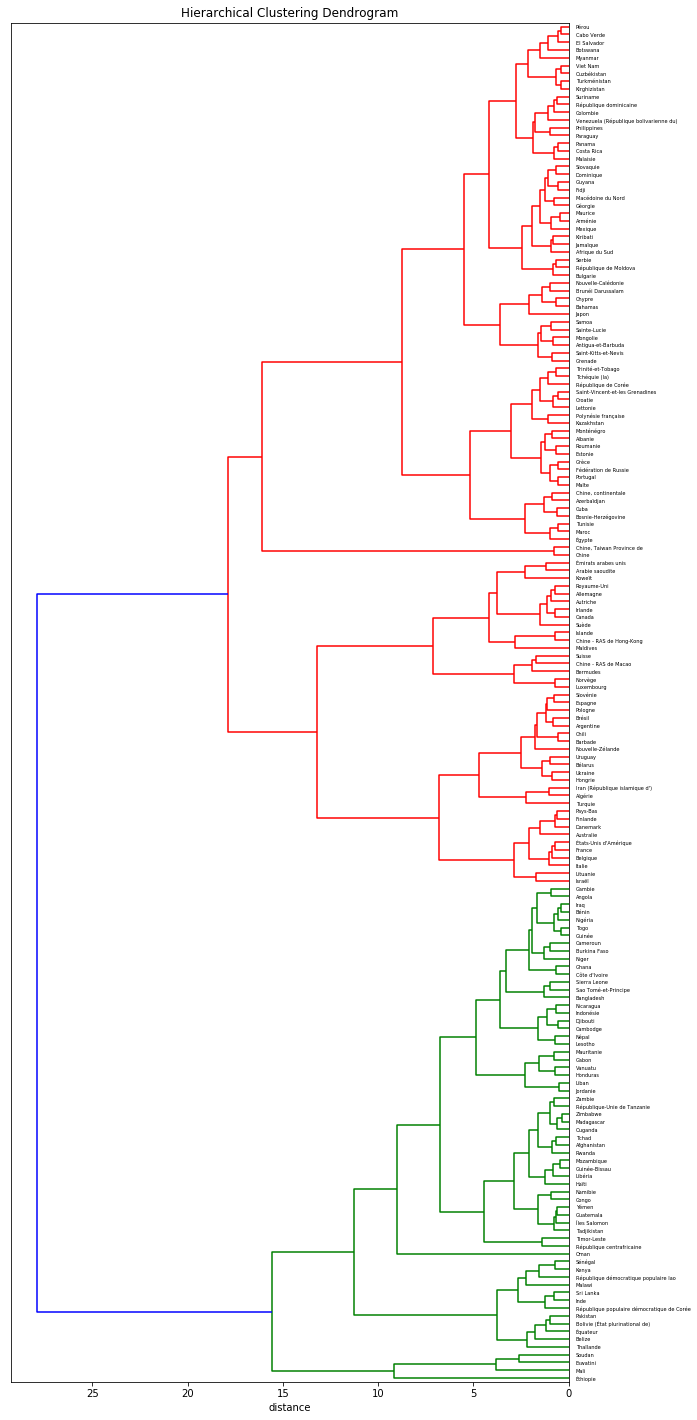

In [22]:
# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
plot_dendrogram(Z, names)

In [23]:
#On coupe le dendogramme en 5 groupes : 
clusters = fcluster(Z, 5, criterion='maxclust') 

In [24]:
print(clusters)

[2 5 5 3 3 2 5 3 3 5 3 3 5 5 2 3 3 2 3 2 5 5 5 3 5 2 3 2 5 2 2 3 3 4 3 3 4
 5 5 5 2 5 5 5 2 3 2 5 5 3 5 1 5 3 3 5 2 2 2 5 5 2 2 2 5 5 2 2 3 2 2 3 2 3
 3 3 3 5 5 2 5 2 5 5 3 2 5 2 2 3 3 5 2 5 2 3 1 5 5 5 2 5 5 5 2 5 2 2 2 2 3
 5 3 2 2 2 5 2 5 5 3 5 3 5 5 5 5 3 2 2 5 5 5 2 2 2 5 5 5 5 2 5 2 5 3 1 2 3
 5 3 2 2 2 5 2 2 2 5 5 5 3 3 3 2 5 5 2 2 2 5 3 2 3 1 2]


In [25]:
clusters_df = pd.DataFrame(clusters, index=echantillon.index, columns=['Clusters'])
clusters_df.head()

,Clusters
Pays,
Afghanistan,2
Afrique du Sud,5
Albanie,5
Algérie,3
Allemagne,3


In [26]:
from scipy.cluster.hierarchy import centroid
#centroid(clusters_df)

In [27]:
#On passe par mean() pour calculer les centroïdes de chaque groupe (Point à vérifier tout de même) 
#Puisque la classification hiérarchique n'utilise pas de centres.

In [28]:
echantillon_grouped = pd.merge(echantillon, clusters_df, left_index = True, right_index = True, how = "left")

echantillon_grouped = echantillon_grouped.groupby('Clusters').mean()
echantillon_grouped

#Il semble que le cluster 3 soit un bon candidat pour notre étude ; 
#Ratio prot très élevé, PIB/H très élevé et en croissance. Par contre plus de la moitié des pays ne sont pas importateurs.

,Année,Ratio_pop (%),Ratio_prot (kg/personne),Dispo_prot (kg/personne),Dispo_alim_tot (kcal/personne),importateur,Ratio_imports_n (%),PIB par habitant (US $),Ratio_PIB (%)
Clusters,,,,,,,,,
1,2013,102.303211,27.977074,25.075500,8.830262e+05,1.000000,6686.714836,1654.747734,101.357353
2,2013,102.426387,27.007896,22.667656,8.976871e+05,0.800000,131.805054,2479.269770,103.799623
3,2013,100.783274,57.192442,37.868837,1.208289e+06,0.404762,92.132643,40153.330270,103.987438
4,2013,100.430890,44.437317,34.269850,1.115075e+06,1.000000,92.772929,0.000000,0.000000
5,2013,100.650881,48.639218,31.040799,1.068666e+06,1.000000,131.919405,10944.339289,103.810752


Augmentons la précision en prenant plus de 5 clusters

In [29]:
clusters_precis = fcluster(Z, 7, criterion='maxclust')

In [30]:
clusters_precis_df = pd.DataFrame(clusters_precis, index=echantillon.index, columns=['Clusters'])
echantillon_precis_grouped = pd.merge(echantillon, clusters_precis_df, left_index = True, right_index = True, how = "left")

echantillon_precis_grouped = echantillon_precis_grouped.groupby('Clusters').mean()
echantillon_precis_grouped

#Le cluster 7 semble être le meilleur : 
#Ratio prot très élevé, PIB élever et en augmentation, pays importateurs de viandes de volailles et imports en augmentation 

,Année,Ratio_pop (%),Ratio_prot (kg/personne),Dispo_prot (kg/personne),Dispo_alim_tot (kcal/personne),importateur,Ratio_imports_n (%),PIB par habitant (US $),Ratio_PIB (%)
Clusters,,,,,,,,,
1,2013,102.303211,27.977074,25.075500,8.830262e+05,1.0,6686.714836,1654.747734,101.357353
2,2013,101.730626,31.456911,22.962150,8.859158e+05,0.0,158.192371,2609.520878,104.129419
3,2013,102.600327,25.895642,22.594032,9.006299e+05,1.0,125.208225,2446.706993,103.717174
4,2013,100.535756,55.252223,36.985596,1.206383e+06,0.0,83.543035,27735.782421,103.939467
5,2013,101.147271,60.045705,39.167721,1.211091e+06,1.0,104.764420,58414.430050,104.057983
6,2013,100.430890,44.437317,34.269850,1.115075e+06,1.0,92.772929,0.000000,0.000000
7,2013,100.650881,48.639218,31.040799,1.068666e+06,1.0,131.919405,10944.339289,103.810752


In [31]:
country_to_keep = pd.merge(echantillon, clusters_precis_df, left_index = True, right_index = True, how = "left")

country_to_keep[country_to_keep.Clusters == 5]

,Année,Ratio_pop (%),Ratio_prot (kg/personne),Dispo_prot (kg/personne),Dispo_alim_tot (kcal/personne),importateur,Ratio_imports_n (%),PIB par habitant (US $),Ratio_PIB (%),Clusters
Pays,,,,,,,,,,
Allemagne,2013,99.911836,60.647007,37.00735,1278595.0,1.0,104.502988,46176.177749,105.624874,5
Arabie saoudite,2013,101.912472,43.585544,33.43035,1188075.0,1.0,111.733693,24934.386142,98.542832,5
Autriche,2013,100.366257,59.190207,38.76300,1376050.0,1.0,101.839922,50137.519579,104.304448,5
Bermudes,2013,100.000000,66.710934,32.98140,973820.0,1.0,78.113208,90329.786048,102.175947,5
Canada,2013,100.987428,52.065486,38.34690,1277135.0,1.0,101.204834,52264.959967,99.988773,5
Chine - RAS de Hong-Kong,2013,100.783436,73.138607,47.11055,1199390.0,1.0,85.076129,38566.712121,104.356553,5
Chine - RAS de Macao,2013,101.615799,64.485488,34.58375,1063975.0,1.0,99.984003,89525.344880,117.031619,5
Irlande,2013,101.114510,58.975525,40.11715,1314730.0,1.0,111.111986,51130.077752,106.038266,5
Islande,2013,101.226994,72.508643,48.56690,1234065.0,1.0,154.767184,47544.160857,108.290327,5


# ACP

In [32]:
from functions import *

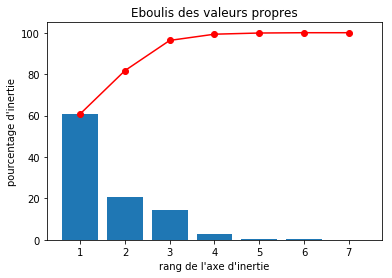

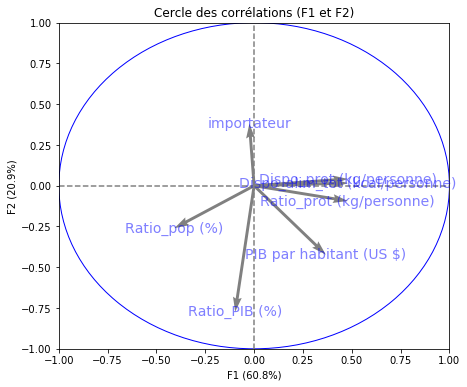

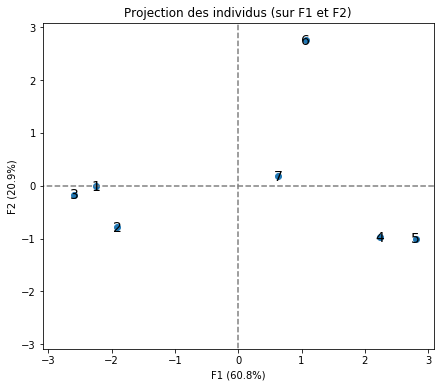

In [33]:
#Choix du nombre de composantes à calculer : 
n_comp = 7

# Selection des colonnes à prendre en compte dans l'ACP : 
data_pca = echantillon_precis_grouped[["Ratio_pop (%)", "Ratio_prot (kg/personne)", "Dispo_prot (kg/personne)", "Dispo_alim_tot (kcal/personne)", "importateur", "PIB par habitant (US $)", "Ratio_PIB (%)"]]

#Préparation des données pour l'ACP :
data_pca = data_pca.fillna(data_pca.mean()) #On remplace les valeurs inconnues par la moyenne de la variable

X = data_pca.values #On ne prend que les valeurs

names = data_pca.index

features = data_pca.columns

#Centrage et réduction : 
std_scale = preprocessing.StandardScaler().fit(X) #On appelle la fonction preprocessing pour centrer
X_scaled = std_scale.transform(X) #On réduit

#Calcul des composantes principales 
pca = decomposition.PCA(n_components = n_comp)
pca.fit(X_scaled)

#Eboulis des valeurs propres 
display_scree_plot(pca)

#Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

#Projection des individus 
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], labels = np.array(names))

plt.show()

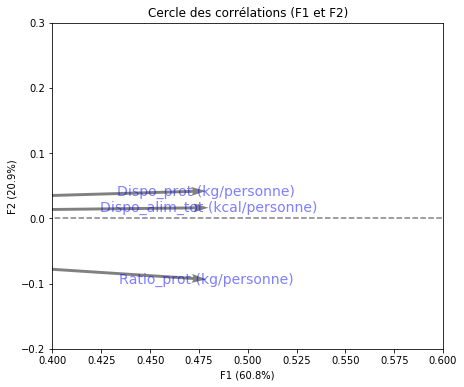

In [34]:
#Zoom
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features), lims=[0.4, 0.6, -0.2, 0.3])

In [35]:
# Interprêtation de F1 : 
# Niveau de richesse du pays ? 

# Test D'adéquation 

In [36]:
from scipy.stats import ks_2samp

H0 : La variable suit une loi normale /// H1 : La variable ne suit pas une loi normale

On rejettera H0 si p_valeur < Alpha

In [37]:
alpha = 0.05

Ratio pop :

In [77]:
np.random.seed(1)
stats, pvalue = ks_2samp(echantillon["Ratio_pop (%)"],list(np.random.normal(np.mean(echantillon["Ratio_pop (%)"]), np.std(echantillon["Ratio_pop (%)"]), 1000)))

if pvalue < alpha :
    print("La variable ne suit pas une loi normale")
else : 
    print("La variable suit une loi normale")

La variable suit une loi normale


Ratio prot :

In [89]:
np.random.seed(1)
stats, pvalue = ks_2samp(echantillon["Ratio_prot (kg/personne)"],list(np.random.normal(np.mean(echantillon["Ratio_prot (kg/personne)"]), np.std(echantillon["Ratio_prot (kg/personne)"]), 1000)))

if pvalue < alpha :
    print("La variable ne suit pas une loi normale")
else : 
    print("La variable suit une loi normale")

La variable suit une loi normale


Dispo_prot : 

In [79]:
np.random.seed(1)
stats, pvalue = ks_2samp(echantillon["Dispo_prot (kg/personne)"],list(np.random.normal(np.mean(echantillon["Dispo_prot (kg/personne)"]), np.std(echantillon["Dispo_prot (kg/personne)"]), 1000)))

if pvalue < alpha :
    print("La variable ne suit pas une loi normale")
else : 
    print("La variable suit une loi normale")

La variable suit une loi normale


Dispo_alim_tot : 

In [80]:
np.random.seed(1)
stats, pvalue = ks_2samp(echantillon["Dispo_alim_tot (kcal/personne)"],list(np.random.normal(np.mean(echantillon["Dispo_alim_tot (kcal/personne)"]), np.std(echantillon["Dispo_alim_tot (kcal/personne)"]), 1000)))

if pvalue < alpha :
    print("La variable ne suit pas une loi normale")
else : 
    print("La variable suit une loi normale")

La variable suit une loi normale


Ratio_imports_n : 

In [81]:
np.random.seed(1)
stats, pvalue = ks_2samp(echantillon["Ratio_imports_n (%)"],list(np.random.normal(np.mean(echantillon["Ratio_imports_n (%)"]), np.std(echantillon["Ratio_imports_n (%)"]), 1000)))

if pvalue < alpha :
    print("La variable ne suit pas une loi normale")
else : 
    print("La variable suit une loi normale")

La variable ne suit pas une loi normale


PIB par habitant : 

In [82]:
np.random.seed(1)
stats, pvalue = ks_2samp(echantillon["PIB par habitant (US $)"],list(np.random.normal(np.mean(echantillon["PIB par habitant (US $)"]), np.std(echantillon["PIB par habitant (US $)"]), 1000)))

if pvalue < alpha :
    print("La variable ne suit pas une loi normale")
else : 
    print("La variable suit une loi normale")

La variable ne suit pas une loi normale


Ratio_PIB : 

In [83]:
np.random.seed(1)
stats, pvalue = ks_2samp(echantillon["Ratio_PIB (%)"],list(np.random.normal(np.mean(echantillon["Ratio_PIB (%)"]), np.std(echantillon["Ratio_PIB (%)"]), 1000)))

if pvalue < alpha :
    print("La variable ne suit pas une loi normale")
else : 
    print("La variable suit une loi normale")

La variable ne suit pas une loi normale


# Test de comparaison

In [45]:
import scipy

H0 : Les deux échantillon sont identiques (moyennes et variances) /// H1 : Les deux échantillons diffèrent

In [46]:
alpha = 0.05

On rejette H0 si p_valeur < alpha

Préparation des datasets :

In [84]:
X = country_to_keep[country_to_keep.Clusters == 5]["Ratio_prot (kg/personne)"]
Y = country_to_keep[country_to_keep.Clusters == 3]["Ratio_prot (kg/personne)"]

Egalité des Variances : 

In [85]:
scipy.stats.bartlett(X,Y)

BartlettResult(statistic=0.008067992261633086, pvalue=0.9284286628267517)

Egalité de moyennes : 

In [86]:
scipy.stats.ttest_ind(X,Y, equal_var=True)

Ttest_indResult(statistic=12.639603911743233, pvalue=6.201753407987884e-19)

In [50]:
#Variance égales et moyennes différentes, on est donc bien sur deux échantillons différents